<a href="https://colab.research.google.com/github/alicevangomez/EDA/blob/main/EDA_INEC_ESI_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Análisis Exploratorio de Datos del Registro de Entradas y Salidas Internacionales en Ecuador**

El dataset incluye los registros de ingreso y salida del territorio ecuatoriano de ciudadanos nacionales y extranjeros durante el año 2024.

Los datos fueron obtenidos del INEC, disponibles en el siguiente enlace: [Datos INEC ESI 2024](https://www.ecuadorencifras.gob.ec/entradas-y-salidas-internacionales/)

#### **Paso 1: Descargar, descomprimir y leer archivo csv**


In [ ]:
import requests
import zipfile
import io
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
import seaborn as sns

import folium
import json

In [ ]:
# 1. URL del archivo ZIP en Datos Abiertos Ecuador
url_zip = "https://datosabiertos.gob.ec/dataset/registros-estadistico-de-entradas-y-salidas-internacionales-2024/resource/527d9bba-f6fd-4a0d-851e-8ed83ee6d54c/download/esi_2024.zip"

# 2. Descargar el archivo
response = requests.get(url_zip)
response.raise_for_status()  # Para detener si hay un error en la descarga

In [ ]:
# 3. Abrir el archivo ZIP en memoria
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    # Listar archivos contenidos
    print("Archivos dentro del ZIP:", z.namelist())

    # Suponiendo que hay un solo CSV, lo abrimos directamente
    # Si hay varios, elige por nombre, por ejemplo:
    # nombre_csv = [name for name in z.namelist() if name.endswith(".csv")][0]
    nombre_csv = z.namelist()[0]
    print("Leyendo archivo:", nombre_csv)

    # 4. Leer el CSV directamente
    with z.open(nombre_csv) as archivo_csv:
        df = pd.read_csv(archivo_csv)

Archivos dentro del ZIP: ['esi_2024.csv']
Leyendo archivo: esi_2024.csv


### **DATA INFORMATION**

---



In [ ]:
df.shape

(6153591, 25)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6153591 entries, 0 to 6153590
Data columns (total 25 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   id_secuencial  int64 
 1   tip_movi       object
 2   tip_naci       object
 3   anio_movi      int64 
 4   mes_movi       object
 5   dia_movi       int64 
 6   sex_migr       object
 7   nac_migr       object
 8   subcont_nac    object
 9   cont_nac       object
 10  via_tran       object
 11  mot_viam       object
 12  pais_prod      object
 13  subcont_prod   object
 14  cont_prod      object
 15  lug_prod       object
 16  pais_res       object
 17  subcont_res    object
 18  cont_res       object
 19  jef_migr       object
 20  pro_jefm       object
 21  can_jefm       object
 22  cla_migr       object
 23  ocu_migr       object
 24  edad           int64 
dtypes: int64(4), object(21)
memory usage: 1.1+ GB


In [ ]:
df.head()

,id_secuencial,tip_movi,tip_naci,anio_movi,mes_movi,dia_movi,sex_migr,nac_migr,subcont_nac,cont_nac,...,lug_prod,pais_res,subcont_res,cont_res,jef_migr,pro_jefm,can_jefm,cla_migr,ocu_migr,edad
0,434783,Salida,Ecuatoriano,2024,Junio,10,Mujer,Ecuador,América del Sur,América,...,Tumbes,Ecuador,América del Sur,América,Centro Binacional de Atención Fronteriza Huaqu...,El Oro,Huaquillas,Clase migratoria para ecuatorianos,Especialistas en politicas de administracion,31
1,2319805,Entrada,Extranjero,2024,Junio,5,Hombre,China,Asia Oriental,Asia,...,Los Ángeles California,China,Asia Oriental,Asia,Aeropuerto Internacional José Joaquín de Olmedo,Guayas,Guayaquil,No inmigrante T-3,Personal de apoyo administrativo no clasificad...,55
2,2705458,Salida,Ecuatoriano,2024,Noviembre,14,Mujer,Ecuador,América del Sur,América,...,Miami Florida,Ecuador,América del Sur,América,Aeropuerto Internacional Mariscal Sucre,Pichincha,Quito,Clase migratoria para ecuatorianos,Sin especificar,38
3,1233217,Salida,Ecuatoriano,2024,Julio,2,Hombre,Ecuador,América del Sur,América,...,Panamá City,Ecuador,América del Sur,América,Aeropuerto Internacional José Joaquín de Olmedo,Guayas,Guayaquil,Clase migratoria para ecuatorianos,Menores de edad,7
4,3063138,Salida,Ecuatoriano,2024,Diciembre,27,Mujer,Ecuador,América del Sur,América,...,Cartagena de Indias,Ecuador,América del Sur,América,Aeropuerto Internacional José Joaquín de Olmedo,Guayas,Guayaquil,Clase migratoria para ecuatorianos,Directores generales y gerentes generales,28


El dataset tiene 6 153 591 registros y 25 columnas.

Las columnas **`id_secuencial`**, **`anio_movi`**, **`dia_movi`** y **`edad`** son de tipo numérico mientras que el resto son de tipo texto.

### **EXPLORATORY DATA ANALYSIS**

---



In [ ]:
data = df.drop('id_secuencial', axis = 1)

In [ ]:
# Conteo de nulos
print(data.isnull().sum())

tip_movi             0
tip_naci             0
anio_movi            0
mes_movi             0
dia_movi             0
sex_migr             0
nac_migr             0
subcont_nac          0
cont_nac             0
via_tran             0
mot_viam             0
pais_prod            0
subcont_prod         0
cont_prod            0
lug_prod             0
pais_res             0
subcont_res          0
cont_res             0
jef_migr             0
pro_jefm             0
can_jefm             0
cla_migr        586046
ocu_migr             0
edad                 0
dtype: int64


In [ ]:
#Quitar la palabra Vía
data['via_tran'] = data['via_tran'].str.replace('Vía', '', regex=False)

In [ ]:
data['via_tran'] = data['via_tran'].str.replace('Aérea', 'aerea', regex=False)
data['via_tran'] = data['via_tran'].str.replace('terrestre', 'terrestre', regex=False)
data['via_tran'] = data['via_tran'].str.replace('Marítimo', 'maritimo', regex=False)

data['via_tran'].unique()

array([' terrestre', ' aerea', ' maritimo', ' fluvial'], dtype=object)

In [ ]:
data.head()

,tip_movi,tip_naci,anio_movi,mes_movi,dia_movi,sex_migr,nac_migr,subcont_nac,cont_nac,via_tran,...,lug_prod,pais_res,subcont_res,cont_res,jef_migr,pro_jefm,can_jefm,cla_migr,ocu_migr,edad
0,Salida,Ecuatoriano,2024,Junio,10,Mujer,Ecuador,América del Sur,América,terrestre,...,Tumbes,Ecuador,América del Sur,América,Centro Binacional de Atención Fronteriza Huaqu...,El Oro,Huaquillas,Clase migratoria para ecuatorianos,Especialistas en politicas de administracion,31
1,Entrada,Extranjero,2024,Junio,5,Hombre,China,Asia Oriental,Asia,aerea,...,Los Ángeles California,China,Asia Oriental,Asia,Aeropuerto Internacional José Joaquín de Olmedo,Guayas,Guayaquil,No inmigrante T-3,Personal de apoyo administrativo no clasificad...,55
2,Salida,Ecuatoriano,2024,Noviembre,14,Mujer,Ecuador,América del Sur,América,aerea,...,Miami Florida,Ecuador,América del Sur,América,Aeropuerto Internacional Mariscal Sucre,Pichincha,Quito,Clase migratoria para ecuatorianos,Sin especificar,38
3,Salida,Ecuatoriano,2024,Julio,2,Hombre,Ecuador,América del Sur,América,aerea,...,Panamá City,Ecuador,América del Sur,América,Aeropuerto Internacional José Joaquín de Olmedo,Guayas,Guayaquil,Clase migratoria para ecuatorianos,Menores de edad,7
4,Salida,Ecuatoriano,2024,Diciembre,27,Mujer,Ecuador,América del Sur,América,aerea,...,Cartagena de Indias,Ecuador,América del Sur,América,Aeropuerto Internacional José Joaquín de Olmedo,Guayas,Guayaquil,Clase migratoria para ecuatorianos,Directores generales y gerentes generales,28


In [26]:
data['ocu_migr'].unique()

array(['Especialistas en politicas de administracion',
       'Personal de apoyo administrativo no clasificado bajo otros epigrafes',
       'Sin especificar', 'Menores de edad',
       'Directores generales y gerentes generales', 'Actores',
       'Amas de casa', 'Asistentes de venta de tiendas y almacenes',
       'Oficiales, operarios y artesanos de artes mecanicas y de otros oficios no clasificados bajo otros epigrafes',
       'Ingenieros no clasificados bajo otros epigrafes',
       'Ingenieros de minas, metalurgicos y afines', 'Ingenieros civiles',
       'Asesores financieros y en inversiones', 'Comerciantes de tiendas',
       'Veterinarios', 'Capitanes, oficiales de cubierta y practicos',
       'Profesionales de la ensenanza no clasificados bajo otros epigrafes',
       'Arquitectos', 'Estudiantes', 'Profesionales de enfermeria',
       'Contables',
       'Profesionales de la publicidad y la comercializacion',
       'Tecnicos en ingenieria mecanica', 'Jubilados y pensionis

## **DATA VISUALIZATION**

---



## **Variables temporales**
Ver la distribución por año y mes para detectar tendencias.

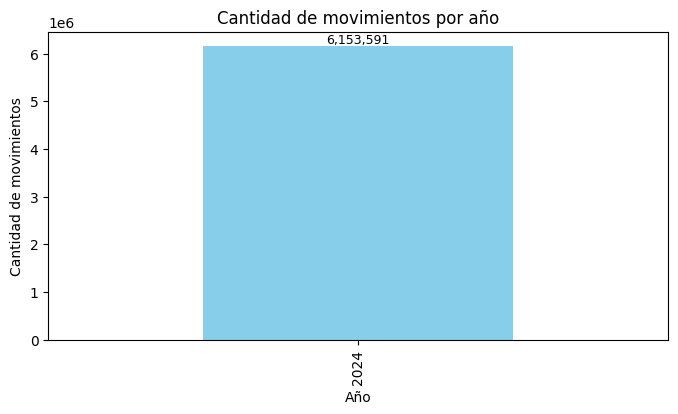

In [ ]:
# Aseguramos que matplotlib muestre números enteros
plt.rcParams['axes.formatter.useoffset'] = False

# --- Conteo por año ---
conteo_anio = data['anio_movi'].value_counts().sort_index()
conteo_anio.plot(kind='bar', figsize=(8,4), color='skyblue')
plt.title("Cantidad de movimientos por año")
plt.xlabel("Año")
plt.ylabel("Cantidad de movimientos")
for i, v in enumerate(conteo_anio):
    plt.text(i, v, f"{v:,}", ha='center', va='bottom', fontsize=9)  # Muestra el número encima
plt.show()

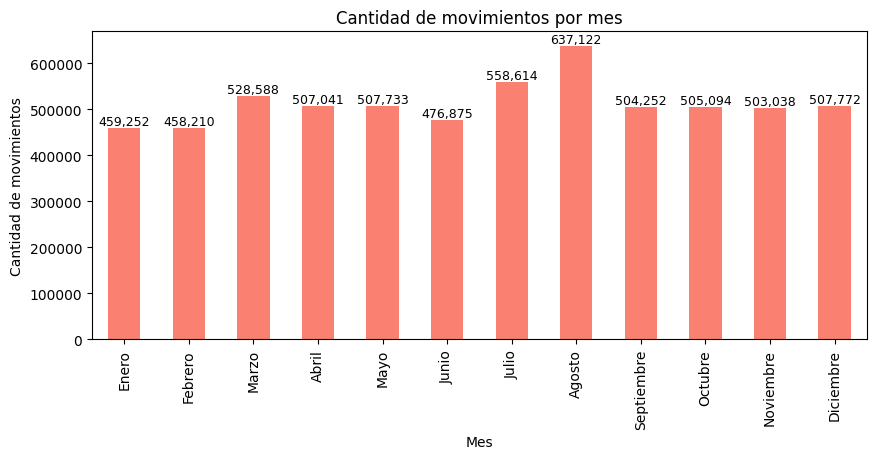

In [ ]:
# Orden correcto de meses
orden_meses = [
    "Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio",
    "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"
]

# Conteo por mes en orden cronológico
conteo_mes = data['mes_movi'].value_counts().reindex(orden_meses)

# Gráfico
conteo_mes.plot(kind='bar', figsize=(10,4), color='salmon')
plt.title("Cantidad de movimientos por mes")
plt.xlabel("Mes")
plt.ylabel("Cantidad de movimientos")
for i, v in enumerate(conteo_mes):
    plt.text(i, v, f"{v:,}", ha='center', va='bottom', fontsize=9)
plt.show()

## **Distribución de tipo de movimiento**

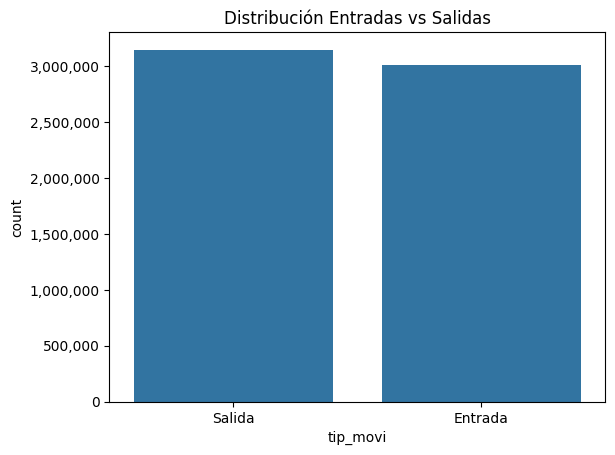

In [ ]:
sns.countplot(data=data, x='tip_movi', order=data['tip_movi'].value_counts().index)

plt.title("Distribución Entradas vs Salidas")
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{int(x):,}"))

plt.show()

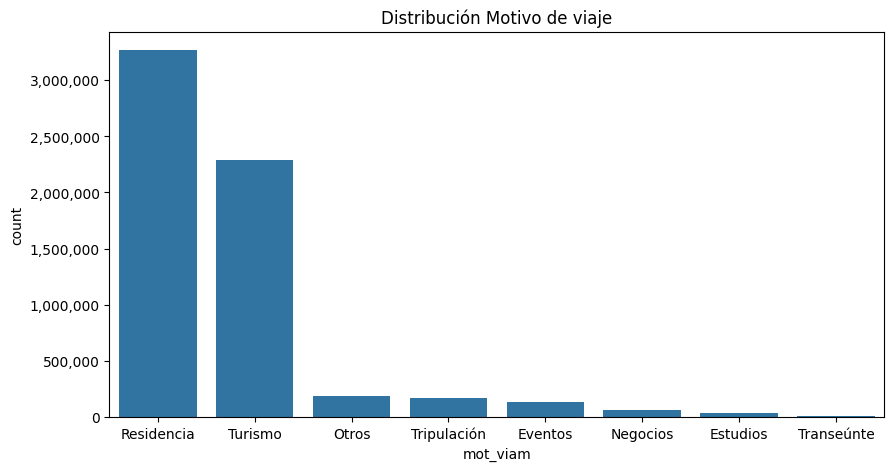

In [ ]:
#ajustar tamaño
plt.figure(figsize= (10,5)) #ancho =10, alto = 5 en pulgadas

sns.countplot(data=data, x='mot_viam', order=data['mot_viam'].value_counts().index)

plt.title("Distribución Motivo de viaje")
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{int(x):,}"))
plt.show()

## **Variables demográficas**

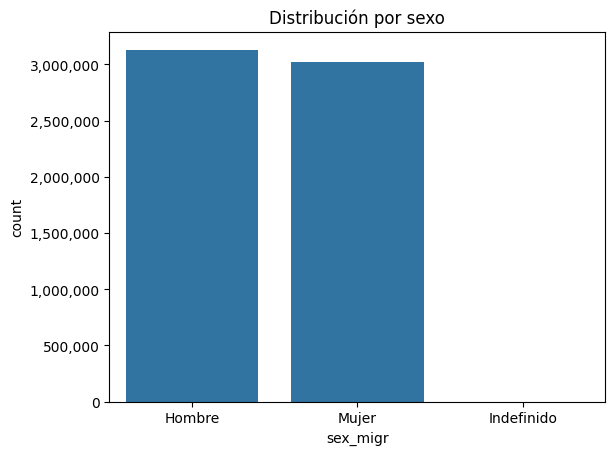

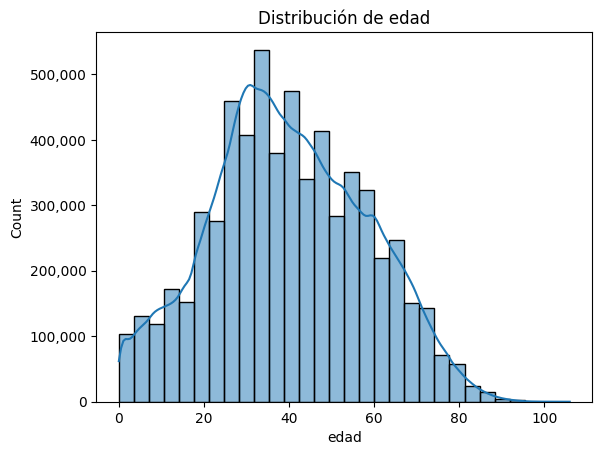

In [ ]:
# Sexo
sns.countplot(data=data, x='sex_migr', order=df['sex_migr'].value_counts().index)
plt.title("Distribución por sexo")
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{int(x):,}"))
plt.show()

# Edad
sns.histplot(data=data, x='edad', bins=30, kde=True)
plt.title("Distribución de edad")
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{int(x):,}"))
plt.show()

## **Países más frecuentes**

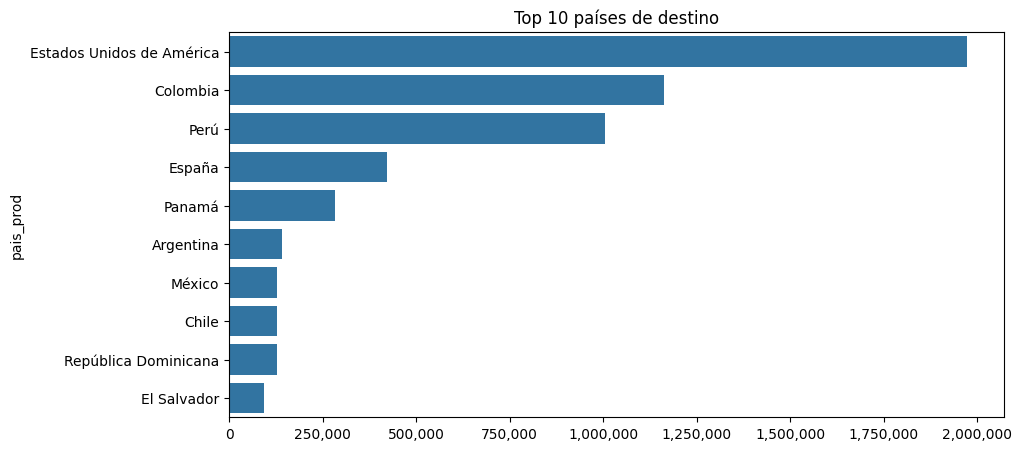

In [ ]:
#ajustar tamaño
plt.figure(figsize= (10,5)) #ancho =10, alto = 5 en pulgadas

# País origen (en salidas) o país destino (en entradas)
top_paises_origen = df['pais_prod'].value_counts().head(10)

sns.barplot(x=top_paises_origen.values, y=top_paises_origen.index)

plt.title("Top 10 países de destino")
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{int(x):,}"))
plt.show()

## **Medio de transporte**

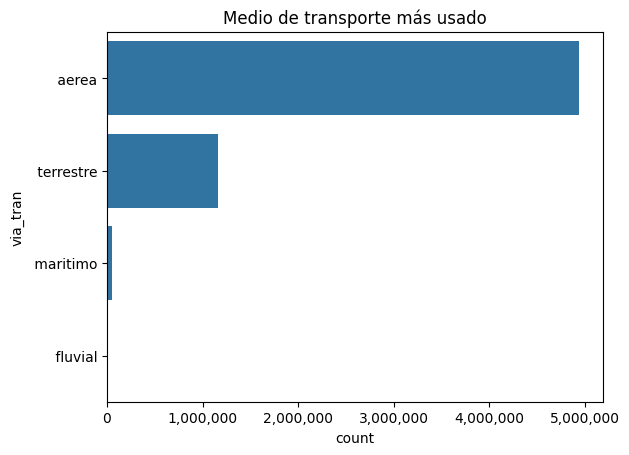

In [ ]:
sns.countplot(data=data, y='via_tran', order=data['via_tran'].value_counts().index)
plt.title("Medio de transporte más usado")
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{int(x):,}"))
plt.show()